In [1]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as pl
import numpy as np
from sympy import *
from sympy.abc import x, y, z

init_printing()

# Gravitational pull of a uniform sheet

A uniform square sheet of metal is floating motionless in space.

<img src="fig.png" width="300">

The sheet is 10 m on a side and of negligible thickness, and it has a mass of 10 metric tonnes.

---

## Question 1

Consider the gravitational force due to the plate felt by a point mass of 1kg a distance $z$ from the
center of the square, in the direction perpendicular to the sheet, as shown above. Show that the
component of the force along the z-axis is

$$F_z = G\sigma z\iint_{-L/2}^{L/2} \frac{\,dx\,dy}{(x^2+y^2+z^2)^{3/2}}$$

where $G$ = 6.674 × 10<sup>-11</sup> m<sup>3</sup> kg<sup>-1</sup> s<sup>-2</sup> is Newton’s gravitational constant and $\sigma$ is the mass per unit area of the sheet.

---

**Proof.** We know from Newton's law of gravitation that

\begin{align}
F &= G\,\frac{m_1m_2}{r^2}
\end{align}

Let $m_1$ be the mass of the particle and $m_2$ be the mass of the plate. Then

\begin{align}
m_2 &= \sigma \,dA \\
&= \sigma \,dx \,dy
\end{align}

$r$, the distance from the particle to any point in the plate, is given by

\begin{align}
r &= \sqrt{x^2 + y^2 + z^2}
\end{align}

The force from the particle from any point in the plate is then given by

\begin{align}
F &= G m_1 \sigma \frac{\,dx \,dy}{x^2 + y^2 + z^2}
\end{align}

We are only looking for the force along the z-axis. We note that

\begin{align}
F_z &= F\sin{\theta} \\
&= F\,\frac{z}{r} \\
&= F\,\frac{z}{\sqrt{x^2 + y^2 + z^2}}
\end{align}

Substituting, we get

\begin{align}
F_z &= G m_1 z \sigma \frac{\,dx \,dy}{(x^2 + y^2 + z^2)^{\frac32}}
\end{align}

The total force experienced by the particle is the double integral of $F$ along the entire sheet, from $-L/2$ to $L/2$. Therefore,

\begin{align}
F_z &= \iint_{-L/2}^{L/2} G m_1 z \sigma \frac{\,dx \,dy}{(x^2 + y^2 + z^2)^{\frac32}} \\
&= G m_1 z \sigma \iint_{-L/2}^{L/2} \frac{\,dx \,dy}{(x^2 + y^2 + z^2)^{\frac32}} \\
&= G \sigma z \iint_{-L/2}^{L/2} \frac{\,dx \,dy}{(x^2 + y^2 + z^2)^{\frac32}} \,\,\, \blacksquare
\end{align}

## Question 2

Calculate and plot the force as a function of $z$ from $z$ = 0 to 10 m.

---

We define the constants and functions below:

In [2]:
G = 6.674e-11
L = 10
m = 10000
rho = m/(L*L)
    
d = (x**2 + y**2 + z**2)**(-3/2)

The force is then given by $G\sigma z$ multiplied by the double integral, which we will evaluate using Simpson's rule (with $N = 100$).

In [3]:
# Intervals (must be even)
N = 5

# Bounds
a = -L/2
b = L/2
h = (b-a)/N

# Converts index to x-value
n_to_x = lambda n: a + h*n

def Fz(zz, debug=False):
    
    # First we integrate along x...
    xint = 0
    for n in range(1, N//2):
        xint += d.subs(x, Float(n_to_x(2*n-2), 3)) \
                + 4*d.subs(x, Float(n_to_x(2*n-1), 3)) \
                + d.subs(x, Float(n_to_x(2*n), 3))
        xint = nsimplify(xint)
    xint *= h/3
    if debug: display(xint)
    
    # ...then we integrate along y
    yint = 0
    for n in range(1, N//2):
        yint += xint.subs(y, Float(n_to_x(2*n-2), 2)) \
                + 4*xint.subs(y, Float(n_to_x(2*n-1), 2)) \
                + xint.subs(y, Float(n_to_x(2*n), 2))
        yint = nsimplify(yint)
    yint *= h/3
    if debug: display(yint)
    
    # Force is then given by
    return G*rho*zz*yint.subs(z, zz)

Plotting the function from $z$ = 0 to 10, we get

In [20]:
xz1 = np.linspace(0, 2, 51)
xz2 = np.linspace(2, 10, 41)
xz = np.concatenate((xz1, xz2))
yz = [Fz(z) for z in xz]

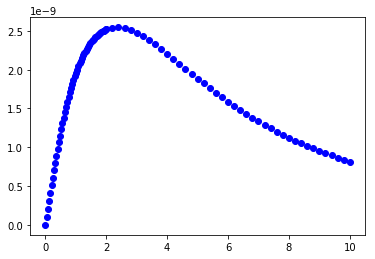

In [21]:
pl.plot(xz, yz, 'bo')

## Question 3

You should see a smooth curve, except at very small values of $z$, where the force should drop off
suddenly to zero. This drop is not a real effect, but an artifact of the way the calculation is done.
Explain briefly where this artifact comes from and suggest a strategy to remove it, or at least to
decrease its size.

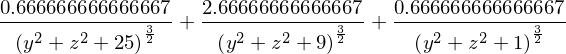

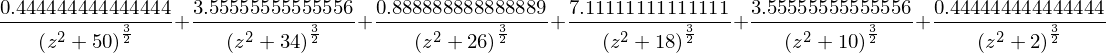

In [6]:
# precision?
Fz(0, debug=True)

---

This calculation can be thought of as a model for the gravitational pull of a galaxy. Most of the mass in a
spiral galaxy (such as our own Milky Way) lies in a thin plane or disk passing through the galactic center,
and the gravitational pull exerted by that plane on bodies outside the galaxy can be calculated by just the
methods we have employed here.